Classification Error Metric Challenges

**Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users.

These reference the Classification Challenges.

#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).



In [215]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

In [216]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [217]:
# Read the data 

VR = pd.read_csv('house-votes-84.csv', header = None)

In [218]:
# Data Processing

VR.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', 
              '16', 'Party']

VR.replace('y', 1, inplace = True)
VR.replace('n', 0, inplace = True)
VR.replace('democrat.', 'democrat', inplace = True)
VR.replace('republican.', 'republican', inplace = True)

VR.replace('?', np.NaN, inplace = True)
VR.fillna(VR.mean(), inplace = True).head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Party
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000,republican
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689,republican
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,democrat
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,democrat
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000,democrat


In [219]:
Y = VR[['Party']]
X = VR.drop('Party', axis = 1)

In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4444)

In [221]:
# Logistic Regression 

model = LogisticRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print (accuracy_score(Y_test, pred))
print (recall_score(Y_test, pred, average = 'macro'))
print (precision_score(Y_test, pred, average = 'macro'))
print (f1_score(Y_test, pred, average = 'macro'))


0.93893129771
0.931457431457
0.942962962963
0.936222005842


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [222]:
# KNN

model = KNeighborsClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print (accuracy_score(Y_test, pred))
print (recall_score(Y_test, pred, average = 'macro'))
print (precision_score(Y_test, pred, average = 'macro'))
print (f1_score(Y_test, pred, average = 'macro'))


0.916030534351
0.911976911977
0.914368650218
0.913114259873


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [223]:
# Gaussian Naive Bayes model 

model = GaussianNB()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print (accuracy_score(Y_test, pred))
print (recall_score(Y_test, pred, average = 'macro'))
print (precision_score(Y_test, pred, average = 'macro'))
print (f1_score(Y_test, pred, average = 'macro'))


0.93893129771
0.928691678692
0.947414658635
0.935784313725


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [224]:
# Support Vector Machine model

model = SVC()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print (accuracy_score(Y_test, pred))
print (recall_score(Y_test, pred, average = 'macro'))
print (precision_score(Y_test, pred, average = 'macro'))
print (f1_score(Y_test, pred, average = 'macro'))


0.954198473282
0.949975949976
0.955452775073
0.952467343977


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [225]:
# Decision Tree model

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print (accuracy_score(Y_test, pred))
print (recall_score(Y_test, pred, average = 'macro'))
print (precision_score(Y_test, pred, average = 'macro'))
print (f1_score(Y_test, pred, average = 'macro'))


0.946564885496
0.940716690717
0.949142156863
0.944373673036


In [226]:
# Random Forest model

model = RandomForestClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

y_score = accuracy_score(Y_test, pred)
print (accuracy_score(Y_test, pred))
print (recall_score(Y_test, pred, average = 'macro'))
print (precision_score(Y_test, pred, average = 'macro'))
print (f1_score(Y_test, pred, average = 'macro'))


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.954198473282
0.94721019721
0.959135802469
0.952166504382


#### Challenge 2

For each, draw the ROC curve and calculate the AUC.

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC is: 0.987734487734


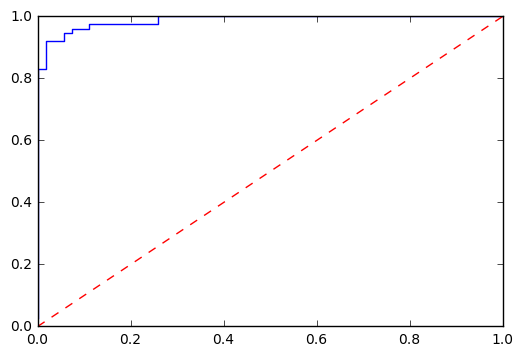

In [227]:
# Logistic Regression 

model = LogisticRegression()
model.fit(X_train, Y_train)
pred_prob = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, pred_prob[:,0], pos_label = 'democrat')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1],'r--')

a = auc(fpr, tpr)
print('AUC is:',a)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


AUC is: 0.948412698413


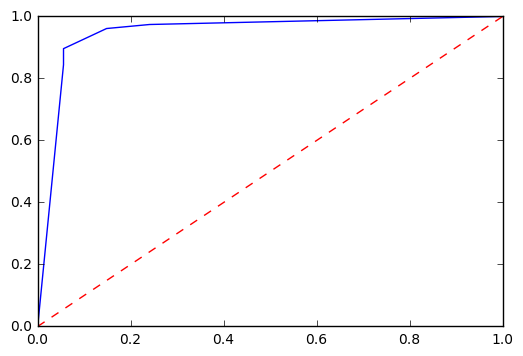

In [228]:
# KNN

model = KNeighborsClassifier()
model.fit(X_train, Y_train)
pred_prob = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, pred_prob[:,0], pos_label = 'democrat')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1],'r--')

a = auc(fpr, tpr)
print('AUC is:',a)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC is: 0.977032227032


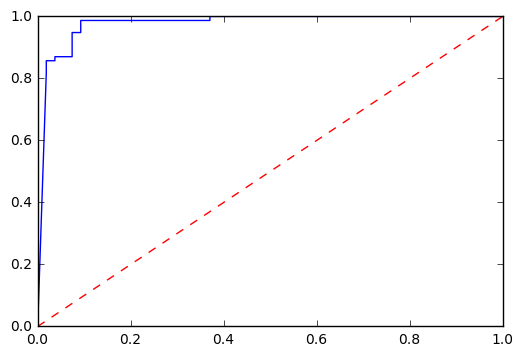

In [229]:
# Gaussian Naive Bayes model 

model = GaussianNB()
model.fit(X_train, Y_train)
pred_prob = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, pred_prob[:,0], pos_label = 'democrat')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1],'r--')

a = auc(fpr, tpr)
print('AUC is:',a)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC is: 0.994949494949


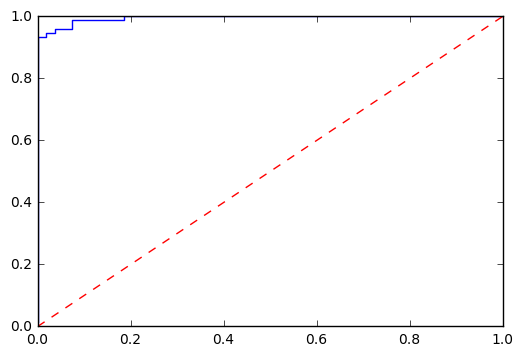

In [230]:
# Support Vector Machine model

model = SVC(probability = True)
model.fit(X_train, Y_train)
pred_prob = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, pred_prob[:,0], pos_label = 'democrat')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1],'r--')

a = auc(fpr, tpr)
print('AUC is:',a)

AUC is: 0.931457431457


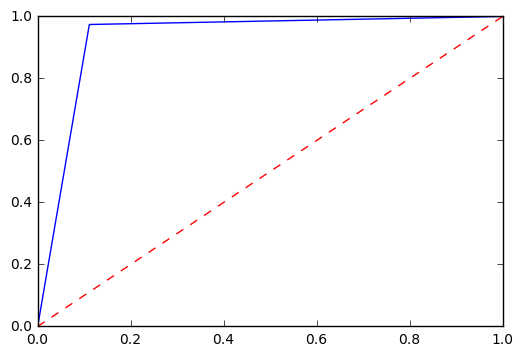

In [231]:
# Decision Tree model

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
pred_prob = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, pred_prob[:,0], pos_label = 'democrat')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1],'r--')

a = auc(fpr, tpr)
print('AUC is:',a)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


AUC is: 0.991462241462


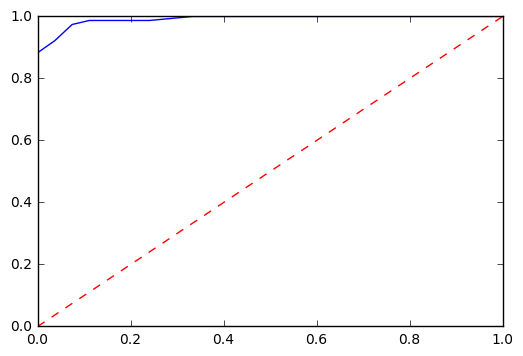

In [232]:
# Random Forest model

model = RandomForestClassifier()
model.fit(X_train, Y_train)
pred_prob = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, pred_prob[:,0], pos_label = 'democrat')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1],'r--')

a = auc(fpr, tpr)
print('AUC is:',a)

#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [233]:
# Logistic Regression 

model = LogisticRegression()

print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'accuracy')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'precision_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'recall_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'f1_micro')))

0.96091954023
0.96091954023
0.96091954023
0.96091954023


In [234]:
# KNN

model = model = KNeighborsClassifier()

print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'accuracy')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'precision_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'recall_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'f1_micro')))

0.933333333333
0.933333333333
0.933333333333
0.933333333333


In [235]:
# Gaussian Naive Bayes model 

model = LogisticRegression()

print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'accuracy')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'precision_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'recall_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'f1_micro')))

0.96091954023
0.96091954023
0.96091954023
0.96091954023


In [236]:
# Support Vector Machine model

model = SVC()

print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'accuracy')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'precision_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'recall_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'f1_micro')))

0.954022988506
0.954022988506
0.954022988506
0.954022988506


In [237]:
# Decision Tree model

model = DecisionTreeClassifier()

print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'accuracy')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'precision_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'recall_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'f1_micro')))

0.949425287356
0.954022988506
0.949425287356
0.947126436782


In [238]:
# Random Forest model

model = RandomForestClassifier()

print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'accuracy')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'precision_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'recall_micro')))
print (np.mean(cross_val_score(model, X, VR['Party'], scoring = 'f1_micro')))

0.963218390805
0.96091954023
0.967816091954
0.958620689655


#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [239]:
MV = pd.read_csv('2013_movies.csv')

In [240]:
X_movie = MV.drop(['Title', 'Director', 'Rating', 'ReleaseDate'], axis = 1)
Y_movie = MV['Rating']

In [241]:
X_movie.fillna(X_movie.mean(), inplace = True).head()

,Budget,DomesticTotalGross,Runtime
0,130000000.0,424668047,146
1,200000000.0,409013994,129
2,150000000.0,400738009,108
3,76000000.0,368061265,98
4,225000000.0,291045518,143


In [242]:
# Logistic Regression 

model = LogisticRegression()

print (np.mean(cross_val_score(model, X_movie, Y_movie, scoring = 'accuracy')))
print (np.mean(cross_val_score(model, X_movie, Y_movie, scoring = 'precision_micro')))
print (np.mean(cross_val_score(model, X_movie, Y_movie, scoring = 'recall_micro')))
print (np.mean(cross_val_score(model, X_movie, Y_movie, scoring = 'f1_micro')))

0.507765151515
0.507765151515
0.507765151515
0.507765151515


//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of 

#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [243]:
HM = pd.read_csv('haberman.csv', header = None)

In [244]:
# Rename the columns

HM.columns = ['Age', 'Yr', 'Axi', 'Surv']

In [245]:
X_hm = HM.drop(['Surv'], axis = 1)
Y_hm = HM['Surv']

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X_hm, Y_hm, test_size = 0.3, random_state = 4444)

AUC is: 0.647522522523


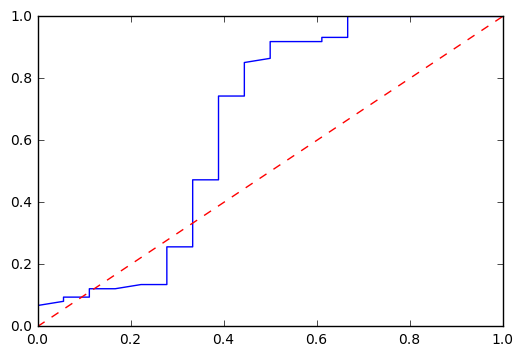

In [247]:
# Logistic Regression 

model = LogisticRegression()
model.fit(X_train, Y_train)
pred_prob = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, pred_prob[:,0], pos_label = 1)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1],'r--')

a = auc(fpr, tpr)
print('AUC is:',a)